In [ ]:
#Pipeline for turning provided JWST files (currently at the same pixel scale) to fits mcmc bins.
#Reliant on the kernels and models generated in *insert name* notebook for image processing and fitting steps.
#Can use *insert name* notebook to then receive corner plots, SED fitted map, SFH, and galaxy map properties.

#Currently designed purely for photometic data of JWST files over a range of filters. 
#Also only designed for use with non-lensed galaxies (i.e., lensed galaxies remain scientifically untested currently)
#Later versions should include: background reductions possibly, allowance for wider ranges of values, simpler varaible initializations if running entire notebook in one go.

#For more information on the functions called in this pipeline and their properties visit https://github.com/aabdurrouf/piXedfit

In [76]:
from astropy.io import fits
filt = ['115w','150w','200w','250m','335m','460m',]
for filter in filt:   
    with fits.open(f"{filter}_full.fits.gz") as hdul:
        # sci
        hdu = hdul[1]
        new_hdu = fits.PrimaryHDU(data=hdu.data, header=hdu.header)
        new_hdu.writeto(f"{filter}_sci.fits.gz", overwrite=True)
    with fits.open(f"{filter}_full.fits.gz") as hdul:
        # err
        hdu = hdul[2]
        new_hdu = fits.PrimaryHDU(data=hdu.data, header=hdu.header)
        new_hdu.writeto(f"{filter}_err.fits.gz", overwrite=True)

In [5]:
#Cropping tool designed by Alex Ross for cropping fits of JWST data.
from astropy.io import fits
import numpy as np
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs import WCS
import os

#Array of all fits files to be cropped, only need sci images, and either wht or err
#No particular order required
fits_files = [

    '115w_sci.fits.gz','115w_err.fits.gz',
    '150w_sci.fits.gz','150w_err.fits.gz',
    '200w_sci.fits.gz','200w_err.fits.gz',
    '250m_sci.fits.gz','250m_err.fits.gz',
    '335m_sci.fits.gz','335m_err.fits.gz',
    '460m_sci.fits.gz','460m_err.fits.gz',
]

#String of path to directory being used
dir_images = "/mnt/d/pixedfit_testing/JWST_Waz/photometric/"

for i, file in enumerate(fits_files):
    file_path = dir_images + file

    with fits.open(file_path) as hdul:
        print(f"Processing {file}...")
        hdu_index = 0
        hdu = hdul[hdu_index]  # Open the appropriate HDU
        img = hdu.data  # Extract image data
        wcs = WCS(hdu.header)  # Extract WCS
        print(f"{file} wcs: ")
        # Define cutout parameters (ensure position is in pixels)
        position = (3579,3886)  # Pixel position (must be integers), format of (X,Y)
        size = (300,150)  # Size of cutout in pixels, format of (height, width)

        # Create cutout
        cutout = Cutout2D(img, position=position, size=size, wcs=wcs)

        # Update FITS HDU
        hdu.data = cutout.data
        hdu.header.update(cutout.wcs.to_header())

        # Save cutout to new FITS file
        cutout_filename = dir_images + 'tall_' + file

        hdu.writeto(cutout_filename, overwrite=True)

    print(f"Saved cutout to {cutout_filename} in {os.path.abspath(cutout_filename)}")

Processing 115w_sci.fits.gz...


Set DATE-AVG to '2023-02-08T10:05:04.908' from MJD-AVG.
Set DATE-END to '2023-02-08T10:14:28.620' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.331478 from OBSGEO-[XYZ].
Set OBSGEO-H to 1600416641.663 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


115w_sci.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_115w_sci.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_115w_sci.fits.gz
Processing 115w_err.fits.gz...
115w_err.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_115w_err.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_115w_err.fits.gz
Processing 150w_sci.fits.gz...


Set DATE-AVG to '2023-02-08T10:27:16.279' from MJD-AVG.
Set DATE-END to '2023-02-08T10:36:39.947' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.335961 from OBSGEO-[XYZ].
Set OBSGEO-H to 1600308892.275 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


150w_sci.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_150w_sci.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_150w_sci.fits.gz
Processing 150w_err.fits.gz...
150w_err.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_150w_err.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_150w_err.fits.gz
Processing 200w_sci.fits.gz...


Set DATE-AVG to '2023-02-08T10:48:50.075' from MJD-AVG.
Set DATE-END to '2023-02-08T10:57:25.450' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.340444 from OBSGEO-[XYZ].
Set OBSGEO-H to 1600201061.096 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


200w_sci.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_200w_sci.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_200w_sci.fits.gz
Processing 200w_err.fits.gz...
200w_err.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_200w_err.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_200w_err.fits.gz
Processing 250m_sci.fits.gz...


Set DATE-AVG to '2023-02-08T10:05:04.924' from MJD-AVG.
Set DATE-END to '2023-02-08T10:14:28.620' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.331478 from OBSGEO-[XYZ].
Set OBSGEO-H to 1600416641.663 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


250m_sci.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_250m_sci.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_250m_sci.fits.gz
Processing 250m_err.fits.gz...
250m_err.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_250m_err.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_250m_err.fits.gz
Processing 335m_sci.fits.gz...


Set DATE-AVG to '2023-02-08T10:27:16.283' from MJD-AVG.
Set DATE-END to '2023-02-08T10:36:39.947' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.335961 from OBSGEO-[XYZ].
Set OBSGEO-H to 1600308892.275 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


335m_sci.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_335m_sci.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_335m_sci.fits.gz
Processing 335m_err.fits.gz...
335m_err.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_335m_err.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_335m_err.fits.gz
Processing 460m_sci.fits.gz...


Set DATE-AVG to '2023-02-08T10:48:50.075' from MJD-AVG.
Set DATE-END to '2023-02-08T10:57:25.450' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    13.340444 from OBSGEO-[XYZ].
Set OBSGEO-H to 1600201061.096 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


460m_sci.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_460m_sci.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_460m_sci.fits.gz
Processing 460m_err.fits.gz...
460m_err.fits.gz wcs: 
Saved cutout to /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_460m_err.fits.gz in /mnt/d/pixedfit_testing/JWST_Waz/photometric/tall_460m_err.fits.gz


In [1]:
#Array of string names of filters that are accepted by pixedfit. 
#Entire list can be found by:
'''
from piXedfit.utils import list_filters
list_filters()
'''
filters = ['sdss_g','sdss_r','sdss_i','sdss_z']
nbands = len(filters)

#Arrays of sci, and wht or err imgs.
#Requires: sci_img array, and either wht_img or err_img arrays.

sci_img = {}
sci_img['sdss_g'] = 'sdss_g_sci.fits'
sci_img['sdss_r'] = 'sdss_r_sci.fits'
sci_img['sdss_i'] = 'sdss_i_sci.fits'
sci_img['sdss_z'] = 'sdss_z_sci.fits'

err_img = {}
err_img['sdss_g'] = 'sdss_g_err.fits'
err_img['sdss_r'] = 'sdss_r_err.fits'
err_img['sdss_i'] = 'sdss_i_err.fits'
err_img['sdss_z'] = 'sdss_z_err.fits'

wht_img = {}

In [2]:
#Creates var images from arrays of images above
#If both wht_img and err_img are provided wht_img will be used
#Output var files will be in the format of: 'var_' followed by original file name
from piXedfit.piXedfit_images import var_img_from_weight_img, var_img_from_unc_img

has_input = False

for filt in filters:
    if filt in wht_img:
        var_img_from_weight_img(wht_img[filt])
        has_input = True
    elif filt in err_img:
        var_img_from_unc_img(err_img[filt])
        has_input = True
    else:
        print(f"WARNING: No WHT or ERR image found for filter: {filt}")

if not has_input:
    print('ERROR: No valid err or wht images were found for any filters.')

In [6]:
#Reinitialize paths and arrays (due to a bug) if not already skipping var_img and or cropping creation step skipped

dir_images = '/mnt/d/pixedfit_testing/ARCSAT/second_attempt/'

filters = ['sdss_g','sdss_r','sdss_i','sdss_z']
nbands = len(filters)

#Arrays of sci, and wht or err imgs.
#Requires: sci_img array, and either wht_img or err_img arrays.

sci_img = {}
sci_img['sdss_g'] = 'sdss_g_sci.fits'
sci_img['sdss_r'] = 'sdss_r_sci.fits'
sci_img['sdss_i'] = 'sdss_i_sci.fits'
sci_img['sdss_z'] = 'sdss_z_sci.fits'

err_img = {}
err_img['sdss_g'] = 'sdss_g_err.fits'
err_img['sdss_r'] = 'sdss_r_err.fits'
err_img['sdss_i'] = 'sdss_i_err.fits'
err_img['sdss_z'] = 'sdss_z_err.fits'

wht_img = {}

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

#Galaxy coordinates and redshift. Replace gal_ra and gal_dec with coords in degrees.
#If redshift is unknown leave as None.
gal_ra = 308.72
gal_dec = 60.15
gal_z = 0.000133

#Convolution kernels to be used for PSF matching
#*Figure out how to fix or implement later*
dir_kernel = '/mnt/d/pixedfit_testing/ARCSAT/second_attempt/'
kernels = {}
kernels['sdss_g'] = dir_kernel+'kernel_SDSS_G_to_SDSS_Z.fits'
kernels['sdss_r'] = dir_kernel+'kernel_SDSS_R_to_SDSS_Z.fits'
kernels['sdss_i'] = dir_kernel+'kernel_SDSS_I_to_SDSS_Z.fits'
kernels['sdss_z'] = None

#Input variance images
var_img = {}

for filt in filters:
    if filt in wht_img:
        var_img[filt] = 'var_' + wht_img[filt]
    elif filt in err_img:
        var_img[filt] = 'var_' + err_img[filt]
    else:
        print(f"WARNING: No WHT or ERR image found for filter: {filt}")

#The unit, scale, and pixel size
#Pixel size can be obtained using calc_pixsize function
from piXedfit.piXedfit_images import calc_pixsize

img_unit = {}
img_scale = {}
img_pixsizes = {}

for filt in filters:
    img_unit[filt] = 'Jy'
    img_scale[filt] = 1.0
    img_pixsizes[filt] = calc_pixsize(dir_images+sci_img[filt])
    
# inspect results
print(img_unit)
print(img_scale)
print(img_pixsizes)

#stamp_size should match the original size of the crops in the cropping tool step for the most ease of use. *can see about way of implementing the size from the crops made above or file size*
stamp_size = [1024,1024]

#Call images_processing class
from piXedfit.piXedfit_images import images_processing

#Function that produces all the crops needed for the following steps involving a fluxmap
#Remove_files can probably be set to True, but for insurance of no issues (despite a messier directory) set to False
img_process = images_processing(filters, sci_img, var_img, gal_ra, gal_dec, dir_images=dir_images, img_unit=img_unit, 
                                img_scale=img_scale, img_pixsizes=img_pixsizes, kernels=kernels, gal_z=gal_z, 
                                stamp_size=stamp_size, remove_files=False, flag_crop=1,flag_psfmatch=1,flag_reproject=1)

{'sdss_g': 'Jy', 'sdss_r': 'Jy', 'sdss_i': 'Jy', 'sdss_z': 'Jy'}
{'sdss_g': 1.0, 'sdss_r': 1.0, 'sdss_i': 1.0, 'sdss_z': 1.0}
{'sdss_g': 0.6700470936733434, 'sdss_r': 0.6704457470351916, 'sdss_i': 0.6703111708581303, 'sdss_z': 0.6704357586585542}
produce stamp_crop_sdss_g_sci.fits
produce stamp_crop_var_sdss_g_err.fits
produce stamp_crop_sdss_r_sci.fits
produce stamp_crop_var_sdss_r_err.fits
produce stamp_crop_sdss_i_sci.fits
produce stamp_crop_var_sdss_i_err.fits
produce stamp_crop_sdss_z_sci.fits
produce stamp_crop_var_sdss_z_err.fits


Gal_EBV = 0.287599


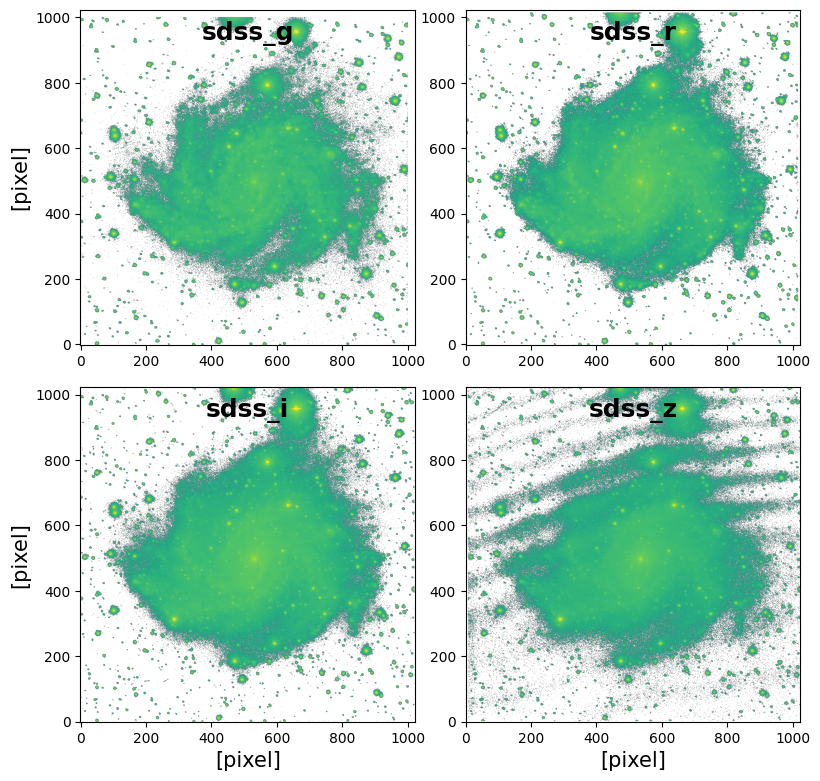

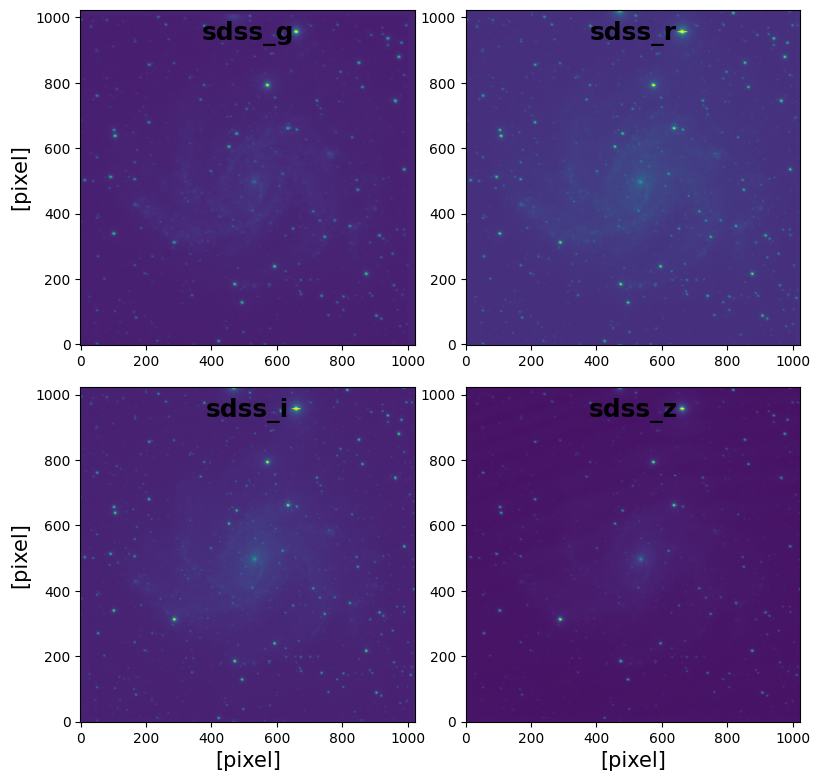

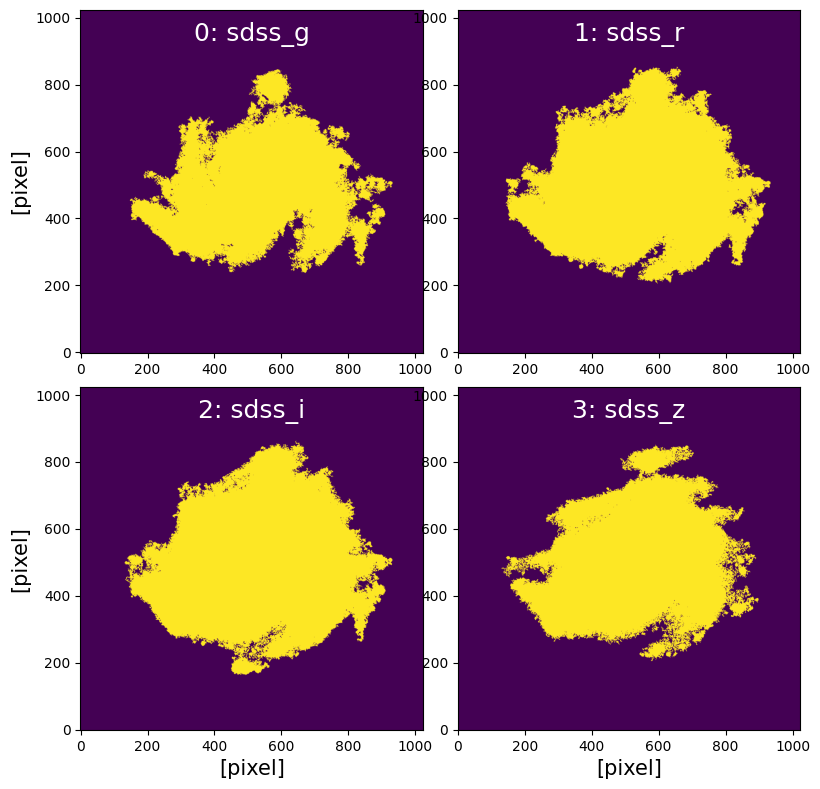

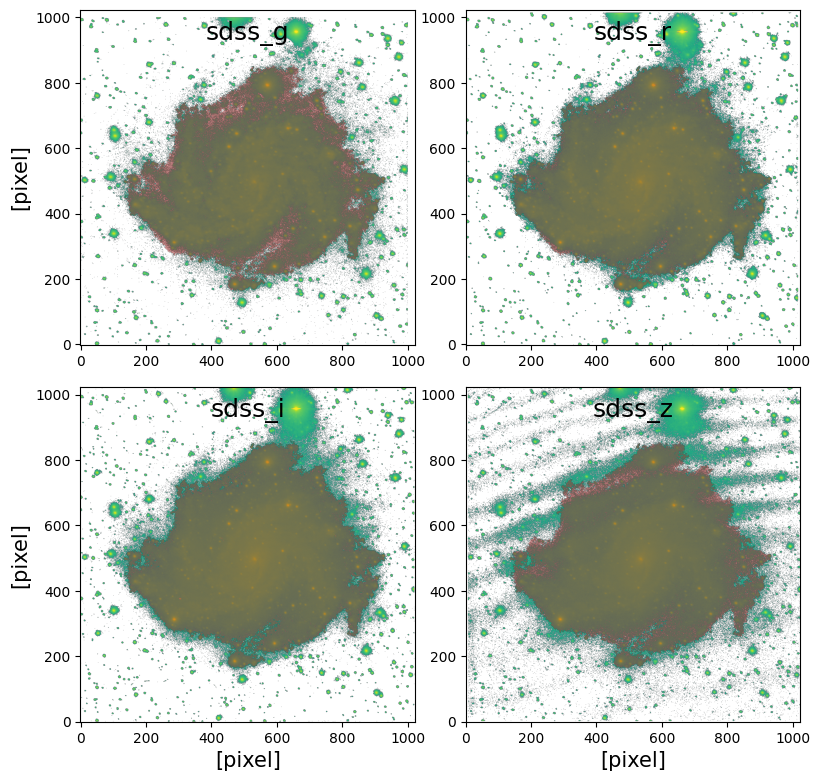

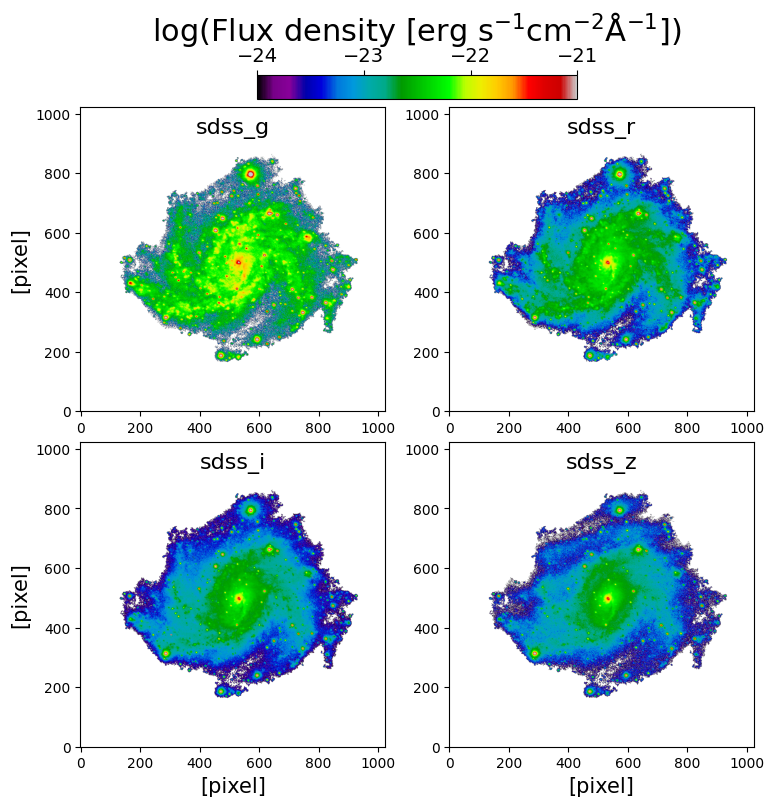

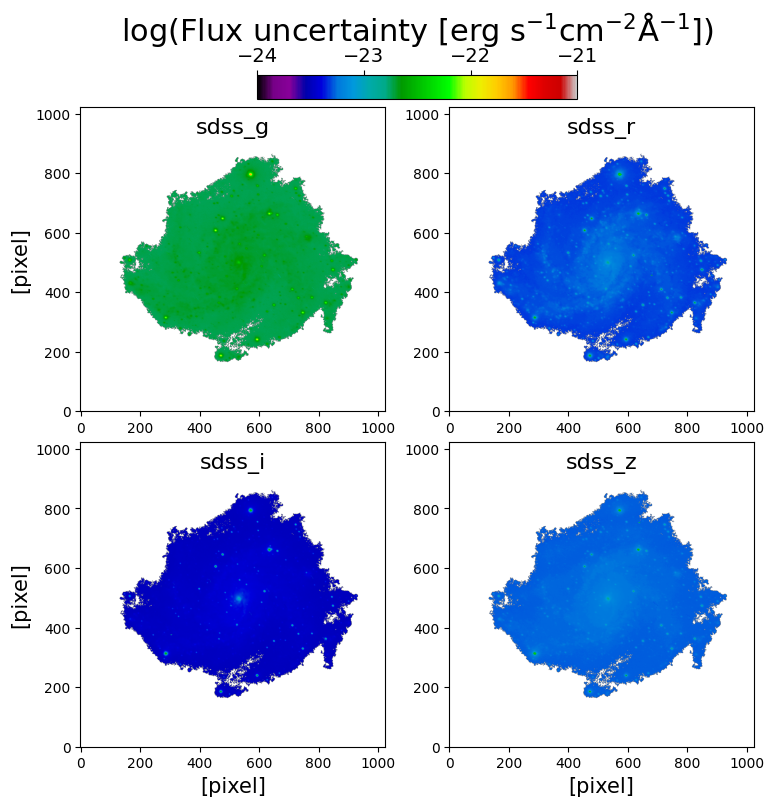

In [22]:
import sep
sep.set_extract_pixstack(1000000)

#Runs multiple processes in succession, final result is that you receive a fluxmap containing data to be used for later sections. 
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

#Just to note but 'ncols' can be set to whichever value is prefered for ease of seeing
img_process.plot_image_stamps(ncols=2)
#Creates a segemented map for each filter that will be used for the region of the galaxy you wish to bin
#For best results change solely the 'thresh' value until you believe you have a suitable region to crop
img_process.segmentation_sep(thresh=0.48, minarea=500, deblend_nthresh=32, deblend_cont=0.85)
img_process.plot_segm_maps(ncols=2)

#Define galaxy's region. 'segm_maps_ids' is an array of ids of the filtered segmentation maps you want to base the crop off.
#For best results undercrop the galaxy isntead of overcropping
segm_maps_ids = [1,2]
gal_region = img_process.galaxy_region(segm_maps_ids=segm_maps_ids)

#Plot the defined galaxy's region
img_process.plot_gal_region(gal_region, ncols=2)

#Get the estimate of foreground Galactic dust extinction based off RA and Dec
from piXedfit.piXedfit_images import EBV_foreground_dust
Gal_EBV = EBV_foreground_dust(gal_ra, gal_dec)
print ('Gal_EBV = %lf' % Gal_EBV)

#Calculate maps of multiband fluxes
flux_maps_fits = "fluxmap.fits"
img_process.flux_map(gal_region, Gal_EBV=Gal_EBV, name_out_fits=flux_maps_fits)

#'vmin' and 'vmax' don't affect the data but can changed to better display the higher flux regions of the galaxy.
from piXedfit.piXedfit_images import plot_maps_fluxes
flux_maps_fits = "fluxmap.fits"
plot_maps_fluxes(flux_maps_fits, ncols=2,vmin=-24, vmax=-21)
plt.show()

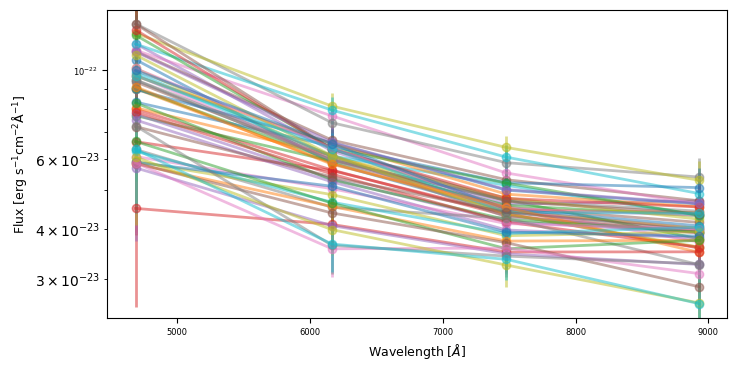

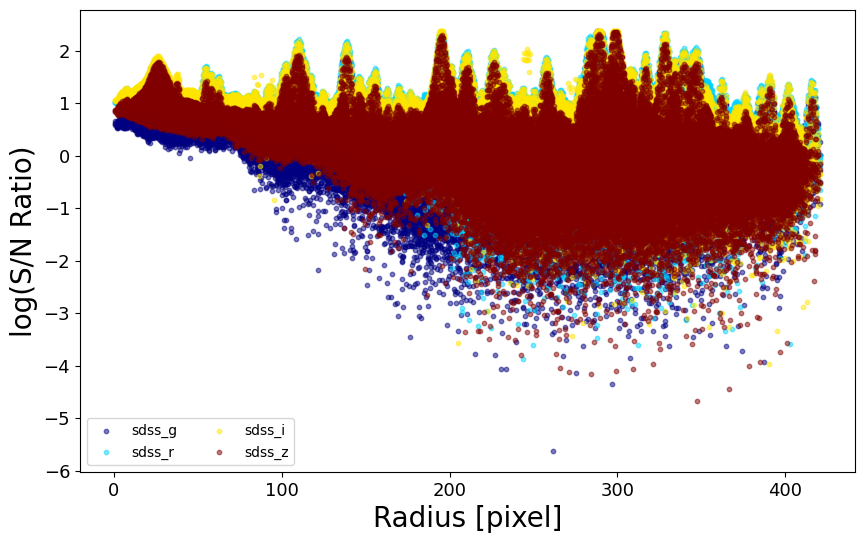

In [23]:
#Not necessary but provides an example of the SED's of a region of the galaxy as well as its SNR
from piXedfit.piXedfit_images import get_pixels_SED_fluxmap
pix_x = np.arange(500,550) #Range of pixels to be mapped in x-axis. Use ints for values
pix_y = np.arange(500,550) #Range of pixels to be mapped in y-axis. Use ints for values
pix_x, pix_y, pix_SED_flux, pix_SED_flux_err, photo_wave = get_pixels_SED_fluxmap(flux_maps_fits, pix_x=pix_x, pix_y=pix_y)

#Maps the SED based off photometric data from fluxmap.
fig1 = plt.figure(figsize=(8,4))
f1 = plt.subplot()
f1.set_yscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=9)
plt.ylabel(r"Flux [erg $\rm{ s}^{-1}\rm{cm}^{-2}\AA^{-1}$]", fontsize=9)
plt.setp(f1.get_xticklabels(), fontsize=6)
plt.setp(f1.get_yticklabels(), fontsize=6)
for ii in range(len(pix_x)):
    plt.errorbar(photo_wave, pix_SED_flux[ii], yerr=pix_SED_flux_err[ii], fmt='-o', lw=2, alpha=0.5)

#Creates SNR radial map of the galaxy
from piXedfit.piXedfit_images import plot_SNR_radial_profile
plot_SNR_radial_profile(flux_maps_fits)

plt.show()

Bins: 76 ==> accumulated pixels: 323638/323638
Number of bins: 76


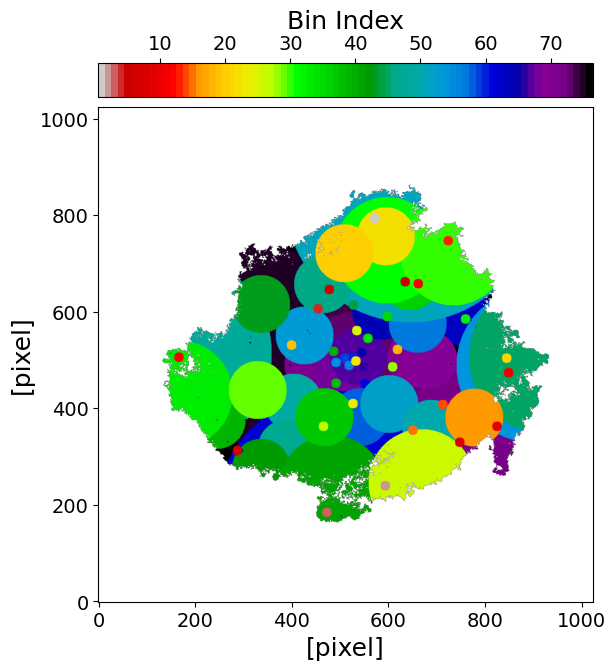

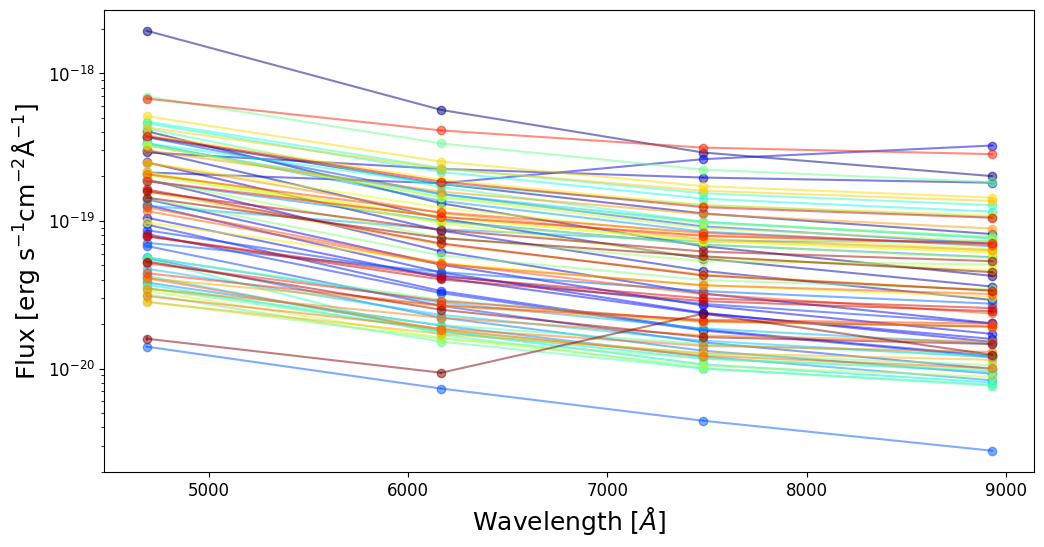

In [4]:
#Creates a binned map of the fluxmap that is to be used in the SED fitting.
#Could technically leave as a single bin but would: defeat purpose of using pixedfit, possibly require different functions later
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from piXedfit.piXedfit_bin import pixel_binning
%matplotlib inline

fits_fluxmap = "fluxmap.fits" 

SNR = np.zeros(nbands)
SNR[0:nbands] = 75.0 #S/N thresholds in all bands. Default is 5.0. Band number should equal number of filters.
ref_band = 0 #Can be changed to whichever filter id you wish to reference for the binning. Must be an int
Dmin_bin = 20.0 #Minimum diameter of a bin in unit of pixel. By default set to 4.0. Primary way of changing the number of total bins.

#Three primary ways to determine choice in number of total bins produced:
#1. Aim for a few dozen and fit the entire galaxy. Best for creating relatively accurate map of properties, takes hours to days. 
#2. Aim for possibly a few hundred bins and fit only the tall few bins for a more accurate fitting, best for testing. Entire galaxy would take days to weeks.
#3. Aim for under 10 bins and fit the entire galaxy. Fastest results but more inaccurate, would take minutes to hours.
pixel_binning(fits_fluxmap, ref_band=ref_band, Dmin_bin=Dmin_bin, SNR=SNR, redc_chi2_limit=2, del_r=50.0, name_out_fits='pixbin_fluxmap.fits')
plt.show()
#Plots the binmap and SED of bins. Can be used to verify choice in bins and their locations.
from piXedfit.piXedfit_bin import plot_binmap, plot_bins_SED
binmap_fits = "pixbin_fluxmap.fits"
plot_binmap(binmap_fits, plot_binmap_spec=False)
plot_bins_SED(binmap_fits, logscale_x=False)
plt.show()

In [3]:
#Set up for fitting of the binned regions of the galaxy. Process can take a long time to run so setup is separated from the running.
import numpy as np
from astropy.io import fits
from piXedfit.piXedfit_fitting import SEDfit_from_binmap

#Get redshift. This can be taken from the header information of binned fluxmap FITS file
#Get number of spatial bins. This can also be taken from the header. 
#File name for the binned fluxmap FITS file
fits_binmap = "pixbin_fluxmap.fits"
hdu = fits.open(fits_binmap)
nbins = int(hdu[0].header['nbins'])
gal_z = float(hdu[0].header['z'])
hdu.close()

#Define priors
from piXedfit.piXedfit_fitting import priors

#Get maximum age at the redshift of the galaxy. This information will be used for defining range of age.
#To take into account for the redshift uncertainty, shift the redshift down to get wider age range.
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70.0, Om0=0.3)
age_univ = cosmo.age(gal_z-0.0) #Value to subtract can vary depending on redshift uncertainty. For precise redshift knowledge leave at 0.
max_log_age = np.log10(age_univ.value)


#Define the ranges of the parameters:
#There's a very long list of parameters that can be adapted, but everything will be defaulted for now except for age based on redshift.
#If you don't have a set redshift to use (i.e., previously set redshift to 0) then can ignore.
ranges = {'log_age':[-1.0,max_log_age]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

print(gal_z, age_univ, max_log_age)

#Define the shape of the priors. Uniform (i.e., flat) prior over the defined range is default.
#Definse more priors and add to 'params_priors' list if you wish to change default values.
prior1 = pr.uniform('log_age')
params_priors = [prior1]

#Range of the spatial bin ids to be fit. Leaving it as None, will fit all the spatial bins in a sequence (not in parallel).
#Note that this ID range start from zero. This means that spatial bin with bin index=1 equal to id of zero in this case.
#binid_range = [] #Use only ints for values. Format: [tall_bin_id, last_bin_id]

#To run fitting to all bins. Refer to comments in binning section for reference of time to run. 
binid_range = [14,nbins]

#Fitting method to be used: MCMC. 
#Note that there's another option that's order of magnitudes faster, but doesn't produce nearly all of the desired outputs.
fit_method = 'mcmc'
nwalkers = 50        #Number of MCMC walkers. Default is 100. 
nsteps = 300       #Number of steps per walker. Default is 600.

nproc = 6 #Number of cores to be used in the calculation process. Default is 10 but heavily discouraged, for personal computers use in range of 1-8.
free_z = 0 #'free_z' is set to 0 if there's a fixed redshift to be used. Set to 1 for fitting to add it as a free parameter. 'gal_z' should not be directly changed.
name_out_fits=None #This array is only initalized if running a set number of bins, otherwise leave as None. Format: array of strings for each bin name.

#Many other parameters can be set for the function prior to running, but for default use case only change the above.

0.000133 13.465126320965272 Gyr 1.1292104320320322


In [ ]:
#There are two primary processes within the fitting process that are run:
#1. Model-related processing. Dependent on # of models input, processing time reliant on # of cores used. Will split # of models amognst # of cores.
#2. Fitting-related processing. Processing time reliant on # of walkers and steps. 'nsteps' in particular determines majority of time to run.
SEDfit_from_binmap(fits_binmap, binid_range=binid_range, models_spec="/mnt/d/pixedfit_testing/ARCSAT/second_attempt/20k_sfh4_min0.hdf5", params_ranges=params_ranges, params_priors=params_priors,
                   free_z=free_z, gal_z=gal_z, fit_method=fit_method, nproc=nproc, nwalkers=nwalkers, nsteps=nsteps, cosmo=0, H0=70.0, Om0=0.3, store_full_samplers=1, 
                   name_out_fits=name_out_fits)

rank 4 --> progress: 1 of 3333 (0%)Number of free parameters: 7
Free parameters: 
['logzsol', 'log_tau', 'log_alpha', 'log_beta', 'log_age', 'dust2', 'log_mass']
Number of fix parameters: 0
Number of parent models in models_spec: 20000
Number of models for initial fitting: 19998
rank 0 --> progress: 3333 of 3333 (100%)


  1%|          | 3/300 [01:34<2:07:23, 25.74s/it]